# 민감도 분석

* 예측값에 얼마나 영향을 미치는지 알아보기 위해 진행
* 모델은 XGBoost 사용

## 반환그래프
* Feed Pressure 포함 그래프
* Feed Pressure 포함되지 않은 그래프

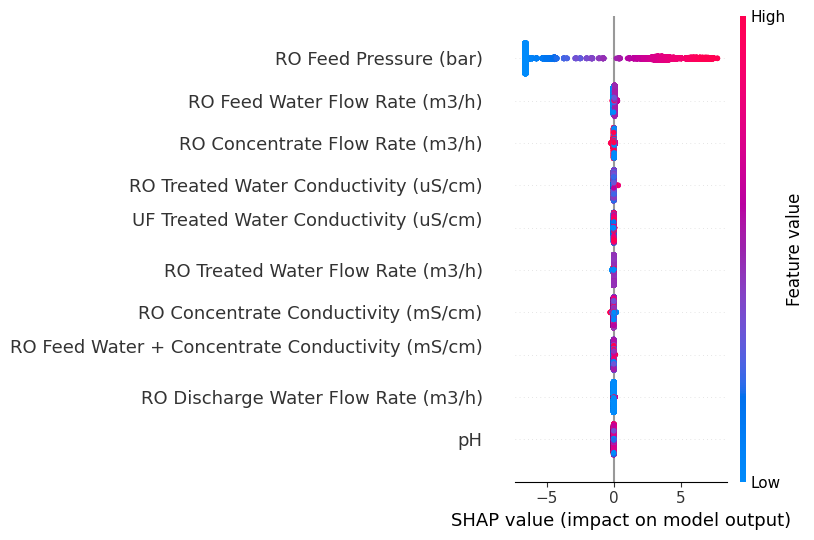

<Figure size 1500x1500 with 0 Axes>

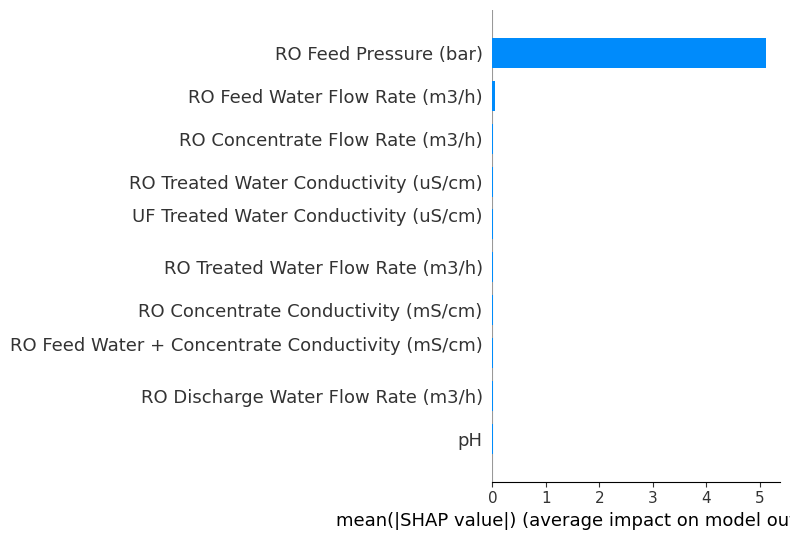

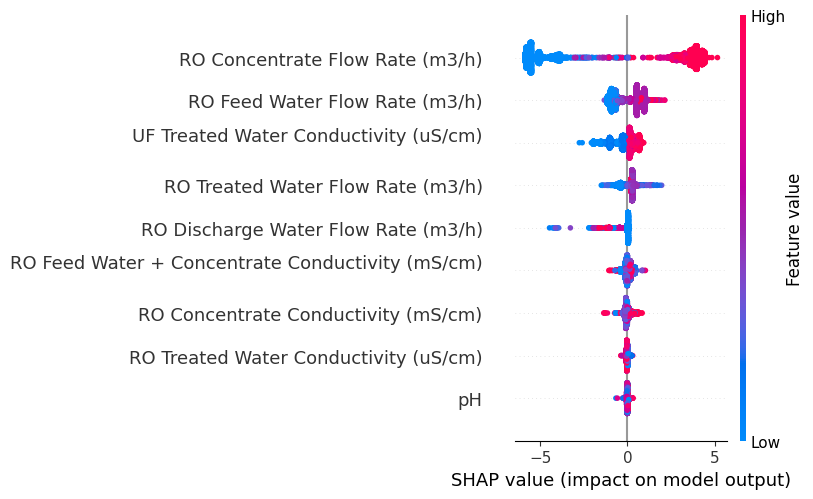

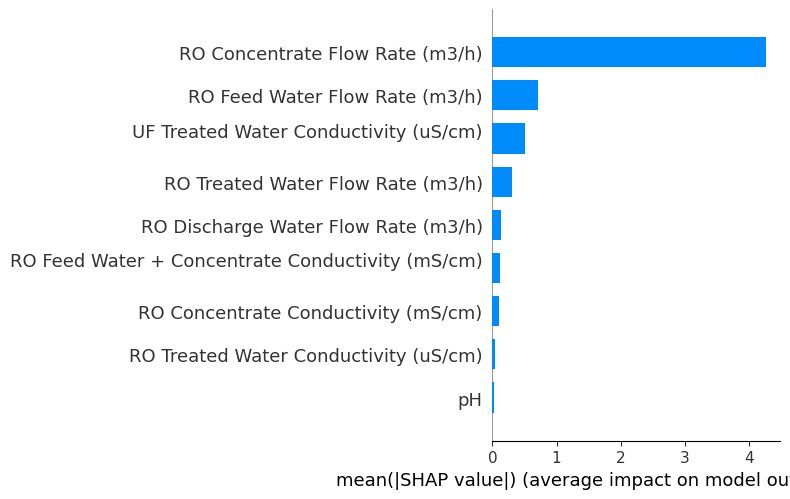

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# 1. 데이터 로드 및 전처리
file_path = '/content/data.CSV'

# 파일 인코딩 추정 및 로드
import chardet
with open(file_path, 'rb') as f:
    raw_data = f.read(10000)
    encoding = chardet.detect(raw_data)['encoding']

data = pd.read_csv(file_path, encoding=encoding)

# 시간 열 제거
if 'Time' in data.columns:
    data = data.drop(columns=["Time"])

# Feature와 Target 분리
X = data.iloc[:, :-1].values  # Feature
y = data.iloc[:, -1].values   # Target

# 데이터 정규화
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. XGBoost 모델 정의 및 학습
model = xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 3. SHAP 분석
# SHAP Explainer 초기화
explainer = shap.Explainer(model)

# 테스트 데이터에 대한 SHAP 값 계산
shap_values = explainer(X_test)

# 4. 시각화

# Feature 중요도 Summary Plot
shap.summary_plot(shap_values, features=X_test, feature_names=data.columns[:-1])

# Feature 중요도 Bar Plot
shap.summary_plot(shap_values, features=X_test, feature_names=data.columns[:-1], plot_type="bar")

# ==============================================
# 시간, Feed Pressure  열 제거
if 'RO Feed Pressure (bar)' in data.columns:
    data = data.drop(columns=["RO Feed Pressure (bar)"])

# Feature와 Target 분리
X = data.iloc[:, :-1].values  # Feature
y = data.iloc[:, -1].values   # Target

# 데이터 정규화
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. XGBoost 모델 정의 및 학습
model = xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 3. SHAP 분석
# SHAP Explainer 초기화
explainer = shap.Explainer(model)

# 테스트 데이터에 대한 SHAP 값 계산
shap_values = explainer(X_test)

# 4. 시각화
# 그래프 사이즈 설정

# Feature 중요도 Summary Plot
shap.summary_plot(shap_values, features=X_test, feature_names=data.columns[:-1])

# Feature 중요도 Bar Plot
shap.summary_plot(shap_values, features=X_test, feature_names=data.columns[:-1], plot_type="bar")
